# Support Vector Machine: Para casa!

Todos os modelos de classificação possuem um [fronteira de decisão](https://ml-playground.com/). Isso é facilmente visto no algoritmo de Vizinhos Mais Próximos. Porém, apesar dessas técnicas criarem uma *fronteira de decisão*, elas não são construídas em torno desse conceito. É nesse campo que entram as Support Vector Machine. O objetivo desse tipo de algoritmo é encontrar uma fronteira que consiga separar o conjunto de dados em classes positivas ou negativas, sendo embasadas no aprendizado estatístico e desenvolvidas por Vapnik.


Dado dois conjunto de dados de classes diferentes em um plano de duas dimensões, existe um conjunto infinito de linhas que podem seperar tais classes. Porém, existem linhas que separam de forma *pior* que outras. No algoritmo do Support Vector Machine, estamos buscando a linha que *melhor* separa os dados, maximizando a distância entre os pontos e a fronteira. Ao levar tal técnica para problemas com mais de duas dimensões, não estaremos buscando linhas separadoras, dado que estamos em espaços no \\(RN\\); porém, estaremos procurando melhor hiperplano.

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/fceb4ea0-9de8-4048-9cc4-c9d4355b671c.png" width = 25%/></center>

Chamamos de $\vec{u}$ uma nova instância a qual queremos classificar, e $\vec{w}$ o vetor que define a fronteira entre os dados. Para classificar a $\vec{u}$, projetamos a instância em $\vec{w}$: quanto maior for o tamanho dessa projeção, maior a chance de $\vec{u}$ ser da classe positiva. Dessa forma, tomando um $c$ como parâmetro, temos a regra:

$$\vec{w} . \vec{u} \geq c $$

$$\vec{w} . \vec{u} - c \geq 0 \implies \textrm{classe positiva} $$

O ponto é: como descobrir $\vec{w}$ e $c$?

Podemos fazer 

$$\vec{w} . \vec{x_{+}} + b \geq 1 \implies \textrm{classe positiva} $$
$$\vec{w} . \vec{x_{-}} + b \leq 1 \implies \textrm{classe negativa} $$

Garantindo assim uma certa margem entre os pontos. Porém, temos duas equações. Podemos transformá-la em uma ao adicionar um $y_i$ que:

$$y_i = 1 \implies \textrm{classe positiva} $$
$$y_i = -1 \implies \textrm{classe negativa} $$

Assim:

$$y_i (\vec{w} . \vec{x_{i}} + b) - 1 \geq 0$$

Adicionamos uma segunda restrição, de igualdade:

$$y_i (\vec{w} . \vec{x_{i}} + b) - 1 = 0$$

Ora, podemos calcular a distância entre as fronteiras de $\vec{x}_{+}$ e $\vec{x}_{-}$ e fazendo o produto escalar entre essa diferença e o vetor unitário de $\vec{w}$:

$$\textrm{largura} = (\vec{x}_{+} - \vec{x}_{-}) . \vec{w}_{unitario}$$

$$\textrm{largura} = (\vec{x}_{+} - \vec{x}_{-}) . \frac{\vec{w}}{||\vec{w}||}$$

$$\textrm{largura} = \frac{\vec{w} . \vec{x}_{+} - \vec{w} . \vec{x}_{-}}{||\vec{w}||} = \frac{2}{||\vec{w}||}$$

Para maximizar a largura, queremos minimizar $||\vec{w}||$. 

Como queremos minimizar $||\vec{w}||$, não tem problemas em minimizar $\frac{1}{2}||\vec{w}||^2$ (famoso pulo do gato, vai facilitar as derivadas no futuro).

Como existem restrições, podemos usar [Lagrange](https://pt.wikipedia.org/wiki/Multiplicadores_de_Lagrange) , ficando com (equação 1):

$$L = \frac{1}{2}||\vec{w}||^2 - \sum_i \alpha_i[y_i(\vec{x}_i \vec{w}_i + b) - 1]$$

Como só temos duas variáveis $\vec{w}$ e $b$ sem contar com os coeficientes lagrangianos, vamos derivar em relação a cada uma delas. Primeiro, em relação a $\vec{w}$:

$$\frac{\partial L}{\partial w} = \vec{w} - \sum_i \alpha_iy_i\vec{x}_i$$

Igualando a 0 (equação 2):

$$\vec{w} - \sum_i \alpha_iy_i\vec{x}_i = 0 \implies \vec{w} = \sum_i \alpha_iy_i\vec{x}_i (2)$$

Agora, em relação a $b$:

$$\frac{\partial L}{\partial b} = - \sum_i \alpha_i y_i$$

Igualando a 0 (equação 3):

$$\sum_i \alpha_i y_i = 0$$

Agora podemos substituir (2) e (3) em (1), chegando em:

$$L = \sum_i\alpha_i - \frac{1}{2}\left(\sum_i \alpha_iy_i\vec{x}_i\right)\left(\sum_j \alpha_jy_j\vec{x}_j\right) $$

Ao minimizar Lagrange, achando os valores dos coeficientes, teremos muitos coeficientes zerados, sobrando apenas os poucos que definem os vetores de suporte.

Dessa forma:

$$g(\vec{x}) = \textrm{sinal}(f(\vec{x}))$$

$$f(\vec{x}) = \vec{w} . \vec{x} - b = \sum_i \alpha_i y_i \vec{x}_i \vec{x} + b$$

PhD de Vapnik acaba aqui. Esse algoritmo, apesar de **lindo**, é pouco prático *as is*, porque traça fronteiras lineares, mas o mundo não é linear. Então, durante 20 anos, o SVM ficou "engavatado" até que a ideia do Kernel Trick apareceu. 

## Kernel trick: Exemplo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
x1_mais = [-3, -2.5, -2, 2, 2.5, 3]
x2_mais = [0]*len(x1_mais)

x1_menos = [-1, 0, 1]
x2_menos = [0]*len(x1_menos)

In [3]:
# x2 serve para ilustrar o Kernel trick

df = pd.DataFrame({
    'x1': x1_mais + x1_menos,
    'x2': x2_mais + x2_menos,
    'y':  [1]*len(x1_mais) + [-1]*len(x1_menos)
})

df

,x1,x2,y
0,-3.0,0,1
1,-2.5,0,1
2,-2.0,0,1
3,2.0,0,1
4,2.5,0,1
5,3.0,0,1
6,-1.0,0,-1
7,0.0,0,-1
8,1.0,0,-1


<AxesSubplot:xlabel='x1', ylabel='x2'>

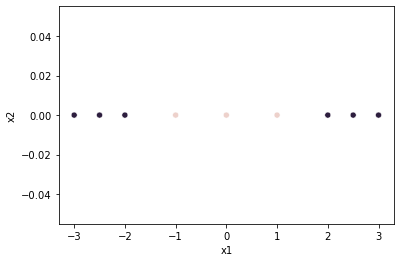

In [7]:
# olhe os dados!
sns.scatterplot(x='x1', y='x2', data=df, hue='y', legend=False)

**Para pensar:** Você consegue traçar uma única linha reta que separe esses dois conjuntos de pontos?

**Resposta:**  Não! O problema não é linearmente separável!

**Como resolver?** feature engineering!

In [8]:
df['x2'] = df['x1']**2

df

,x1,x2,y
0,-3.0,9.00,1
1,-2.5,6.25,1
2,-2.0,4.00,1
3,2.0,4.00,1
4,2.5,6.25,1
5,3.0,9.00,1
6,-1.0,1.00,-1
7,0.0,0.00,-1
8,1.0,1.00,-1


<AxesSubplot:xlabel='x1', ylabel='x2'>

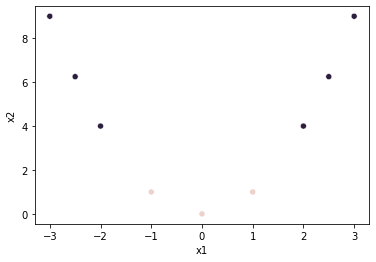

In [9]:
sns.scatterplot(x='x1', y='x2', data=df, hue='y', legend=False)

**Para pensar:**  O problema se tornou linearmente separável!

## Kernel trick: Pratica

No SVM, o 'kernel trick' automatiza o processo ilustrado acima, o que torna esse modelo recomendável para tratar de problemas que não são separáveis linearmente!

SVM pode ser usado para regressão e classificação:

        - SVR: Support Vector Regressor 
        - SVC: Support Vector Classifier

In [10]:
from sklearn.svm import SVC, SVR

**Execício:** Modele o problema acima sem criar a nova feature!

In [15]:
svm = SVC(kernel='rbf')

# exemplo pedagógico: treino e teste no mesmo conjunto! Não façam isso!!!!!!!
svm.fit(df[['x1']], df['y'])

svm.predict(df[['x1']])


array([ 1,  1,  1,  1,  1,  1, -1, -1, -1], dtype=int64)

In [16]:
df['y']

0    1
1    1
2    1
3    1
4    1
5    1
6   -1
7   -1
8   -1
Name: y, dtype: int64

 O SVC usou o kernel='rbf' para achar o melhor hiperplano que separa nossos dados fake e doidos!

**Desafio:** Você consegue modelar esse problema (y_pred = df['y']) com outras técnicas que aprendeu até agora?

## Polynomial kernels

### Construir um dataset aleatório, a princípio

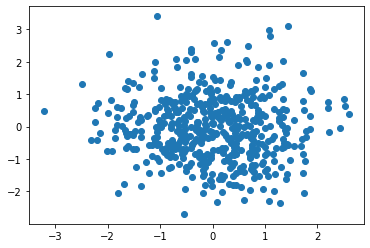

In [17]:
# numero de pontos
n = 500

# assegurar reprodutibilidade
np.random.seed(13)

# dataset
X = np.random.randn(n, 2)
plt.scatter(X[:,0], X[:,1]);

### Criar o target apropriado

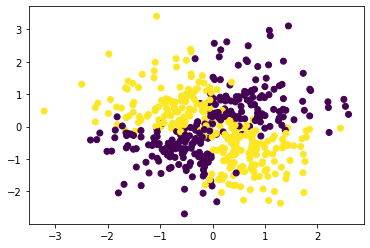

In [18]:
noise = 0.2

epsilon = noise * np.random.randn(n, )
x1 = X[:, 0]
x2 = X[:, 1]

y_bool = np.logical_xor(
    x1 > epsilon, 
    x2 > epsilon
    )
y = np.where(y_bool, 1,0)

# verificar o dataset
plt.scatter(X[:, 0], X[:, 1], c=y)

### Modelos lineares

**Exercício:** Treine um modelo linear de sua escolha e use a função `plot_decision_regions` para verificar gráficamente a qualidade do resultado.

<AxesSubplot:>

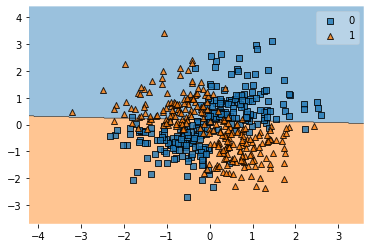

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X, y)

plot_decision_regions(X, y, clf=lr)

Qual a acurácia desse modelo?

In [20]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X)
accuracy_score(y, y_pred)

0.522

Outro modelo?

### Polynomial kernel

Mais detalhes [aqui](https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f).

# Overfitting 

Overfitting (sobre-ajuste) é um termo usado em estatística para descrever quando um modelo estatístico se ajusta muito bem ao conjunto de dados anteriormente observado, mas se mostra ineficaz para prever novos resultados.

**Pergunta:** Até que ponto podemos melhorar um modelo?

In [ ]:
# outro dataset
from sklearn.datasets import make_moons
n = 200
X_moon,y_moon = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X_moon[:,0], X_moon[:,1], c=y_moon)

## Faça um modelo inicial

In [ ]:
# tente com diferentes graus de polinomios!
# note que só X e Y são diferentes do exemplo anterior



## Melhore seu modelo
### RBF kernel

Mais detalhes [aqui](https://en.wikipedia.org/wiki/Radial_basis_function_kernel).

## Cuidado: Não podemos melhorar para sempre!

In [ ]:
# cuidado com overfiting!!!!! -- modelo ruim para exemplificar!


### Outros classificadores?

Explore o [Playgrond](https://ml-playground.com/#)!